## Data and packages

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.patches import Rectangle
# plt.rcParams.update({'font.size': 12})

In [2]:
# fires = gpd.read_file("/g/data/ng72/as9583/fire/total_fires.gpkg")
fires = gpd.read_file("/g/data/ng72/as9583/merged_fires.gpkg")

## Map for visualisation over 2.2km domain

In [3]:
GDF = gpd.read_file("/g/data/k10/pg1235/abby_smyth_project/STE_2021_AUST_GDA2020.shp") #australia shapefile

border = GDF[GDF["STE_CODE21"].isin(["1", "2", "8"])] #selecting just ACT, VIC and NSW 
border = border.dissolve(by="AUS_CODE21").geometry.iloc[0] #and dissolving them
border_gdf = gpd.GeoDataFrame(geometry=[border], crs=GDF.crs) 

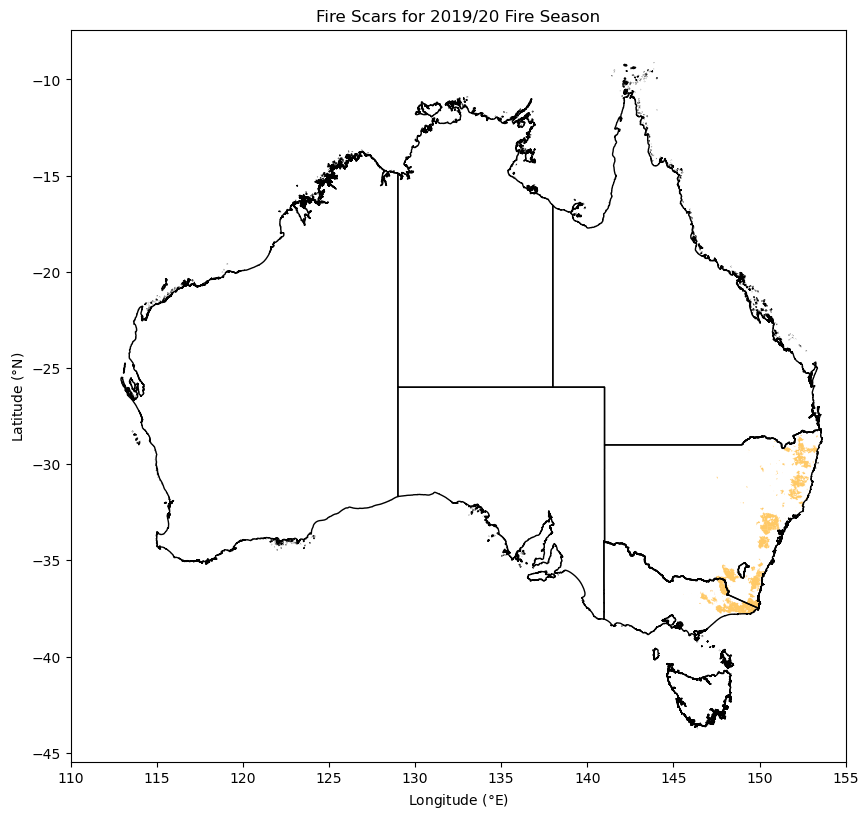

In [5]:
ax = fires.plot(color='orange', figsize=(10, 10), alpha=0.6)

GDF.boundary.plot(ax=ax, edgecolor='black', linewidth=1)

ax.set_xlim(left=110, right=155)

plt.title("Fire Scars for 2019/20 Fire Season")
plt.xlabel("Longitude ($\\degree$E)")
plt.ylabel("Latitude ($\\degree$N)")

plt.show()

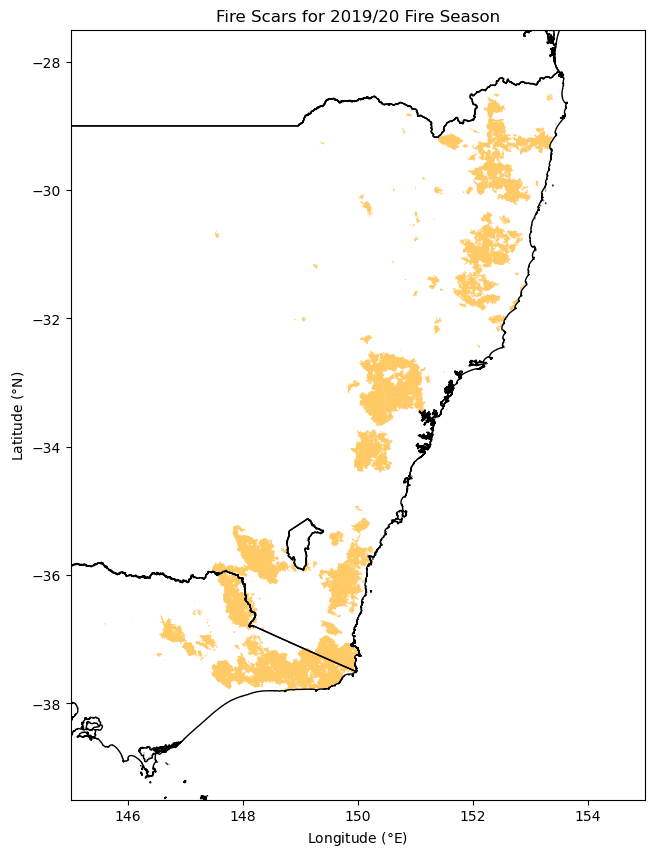

In [6]:
ax = fires.plot(color='orange', figsize=(10, 10), alpha=0.6)

GDF.boundary.plot(ax=ax, edgecolor='black', linewidth=1)

ax.set_xlim(left=145, right=155)
ax.set_ylim(top= -27.5, bottom = -39.5)

plt.title("Fire Scars for 2019/20 Fire Season")
plt.xlabel("Longitude ($\\degree$E)")
plt.ylabel("Latitude ($\\degree$N)")

plt.show()

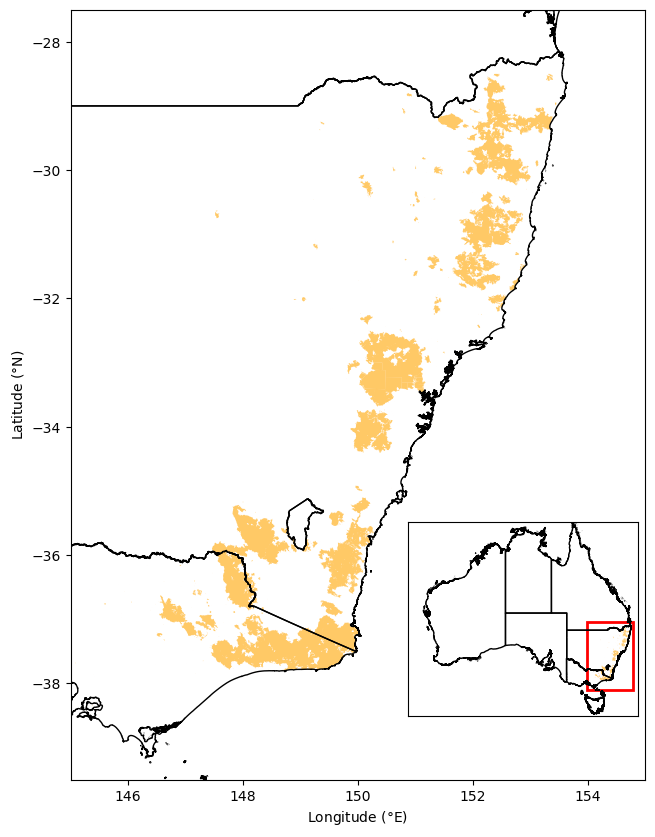

In [7]:
draft = True 
fig, ax_main = plt.subplots(figsize=(10, 10))

fires.plot(ax=ax_main, color='orange', alpha=0.6)
GDF.boundary.plot(ax=ax_main, edgecolor='black', linewidth=1)
ax_main.set_xlim(145, 155)
ax_main.set_ylim(-39.5, -27.5)
ax_main.set_xlabel("Longitude ($\\degree$E)")
ax_main.set_ylabel("Latitude ($\\degree$N)")

ax_inset = inset_axes(ax_main, width="40%", height="40%", loc='lower right')

fires.plot(ax=ax_inset, color='orange', alpha=0.6)
GDF.boundary.plot(ax=ax_inset, edgecolor='black', linewidth=1)
ax_inset.set_xlim(110, 155)
ax_inset.set_ylim(-44, -10)
ax_inset.set_xticks([])
ax_inset.set_yticks([])

#get main map extent
x0, x1 = ax_main.get_xlim()
y0, y1 = ax_main.get_ylim()

#rectangle inset
rect = Rectangle(
    (x0, y0),                #bottom-left corner (x, y)
    (x1 - 1) - x0,                 #width
    y1 - y0,                 #height
    linewidth=2, edgecolor='red', facecolor='none'
)
ax_inset.add_patch(rect)

if draft == False:
    fig.savefig("/g/data/ng72/as9583/figures/firescar.png", dpi=300, bbox_inches="tight")
plt.show()